## Cyclistic: Google Capstone Project with Python

### Introduction:
Welcome to the Cyclistic bike-share analysis case study! Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Characters and Teams:
* **Cyclistic**: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

* **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

* **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

* **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

## About the company:
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Business Task:
Understanding the nature of bike usage between annual members & casual members and to introduce strategy to increase the number of annual memberships.

### Data Preparation

#### Import Libraries

In [134]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import math

#### Import Datasets

In [135]:
df1=pd.read_csv('202201-divvy-tripdata.csv')
df2=pd.read_csv('202202-divvy-tripdata.csv')
df3=pd.read_csv('202203-divvy-tripdata.csv')
df4=pd.read_csv('202204-divvy-tripdata.csv')
df5=pd.read_csv('202205-divvy-tripdata.csv')
df6=pd.read_csv('202206-divvy-tripdata.csv')
df7=pd.read_csv('202207-divvy-tripdata.csv')
df8=pd.read_csv('202208-divvy-tripdata.csv')
df9=pd.read_csv('202209-divvy-publictripdata.csv')
df10=pd.read_csv('202210-divvy-tripdata.csv')
df11=pd.read_csv('202211-divvy-tripdata.csv')
df12=pd.read_csv('202212-divvy-tripdata.csv')


In [136]:
data=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

In [137]:
df_cycle=pd.concat(data,ignore_index=True)

In [138]:
df_cycle.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [139]:
df_cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [140]:
df_cycle.shape

(5667717, 13)

### Data Processing

We will look for the null values and duplicates in the dataset to remove them.

In [141]:
df_cycle.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [142]:
df_cycle.shape

(5667717, 13)

In [143]:
len(df_cycle)

5667717

In [144]:
df_cycle.shape

(5667717, 13)

In [145]:
(df_cycle.isna().sum()/len(df_cycle))*100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.698405
start_station_id      14.698405
end_station_name      15.751351
end_station_id        15.751351
start_lat              0.000000
start_lng              0.000000
end_lat                0.103357
end_lng                0.103357
member_casual          0.000000
dtype: float64

The missing values are less than 18%. We can remove them and continue with our analysis

In [146]:
df_cycle.dropna(axis=0, inplace=True)

In [147]:
df_cycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369360 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 466.7+ MB


Checking duplicate values

In [148]:
df_cycle[df_cycle.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


To improve the analysis, it is better to convert the 'started_at' and 'ended_at' data types from object to datetime. This will allow for more accurate time-based analysis

Before proceeding with the analysis, it is advisable to create a new dataframe by copying the original dataframe. This will enable us to conduct the analysis without modifying the original data

In [156]:
df_ride=df_cycle.copy()

In [157]:
df_ride=df_cycle.loc[:,['rideable_type','started_at','ended_at','start_station_name','end_station_name']]

In [158]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St
...,...,...,...,...,...
5667712,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd
5667713,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St
5667714,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St
5667715,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd


In [149]:
started_at = pd.to_datetime(df_cycle['started_at'])

In [150]:
ended_at = pd.to_datetime(df_cycle['ended_at'])

In [151]:
length = ended_at - started_at

In [154]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St
...,...,...,...,...,...
5667712,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd
5667713,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St
5667714,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St
5667715,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd


In [160]:
df_ride['ride_length']=length

In [161]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02
...,...,...,...,...,...,...
5667712,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:44
5667713,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,0 days 00:12:59
5667714,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,0 days 00:04:33
5667715,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:56


In [162]:
df_ride.reset_index(inplace=True)

In [163]:
df_ride.columns

Index(['index', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'ride_length'],
      dtype='object')

In [164]:
df_ride=df_ride.drop('index',1)

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_6600\3607733441.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_ride=df_ride.drop('index',1)


In [165]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02
...,...,...,...,...,...,...
4369355,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:44
4369356,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,0 days 00:12:59
4369357,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,0 days 00:04:33
4369358,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:56


In [166]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369360 entries, 0 to 4369359
Data columns (total 6 columns):
 #   Column              Dtype          
---  ------              -----          
 0   rideable_type       object         
 1   started_at          object         
 2   ended_at            object         
 3   start_station_name  object         
 4   end_station_name    object         
 5   ride_length         timedelta64[ns]
dtypes: object(5), timedelta64[ns](1)
memory usage: 200.0+ MB


converting dtype of started_at and ended_at

In [167]:
df_ride['started_at']=pd.to_datetime(df_ride['started_at'])

In [168]:
df_ride['ended_at']=pd.to_datetime(df_ride['ended_at'])

In [169]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369360 entries, 0 to 4369359
Data columns (total 6 columns):
 #   Column              Dtype          
---  ------              -----          
 0   rideable_type       object         
 1   started_at          datetime64[ns] 
 2   ended_at            datetime64[ns] 
 3   start_station_name  object         
 4   end_station_name    object         
 5   ride_length         timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 200.0+ MB


Identifying the days on which people prefer to ride and ending the ride

In [173]:
df_ride['started_weekday']=df_ride['started_at'].dt.day_name()

In [174]:
df_ride['started_weekday']

0           Thursday
1             Monday
2            Tuesday
3            Tuesday
4           Thursday
             ...    
4369355       Monday
4369356    Wednesday
4369357     Thursday
4369358    Wednesday
4369359       Friday
Name: started_weekday, Length: 4369360, dtype: object

In [184]:
df_ride['ended_weekday']=df_ride['ended_at'].dt.day_name()

In [185]:
df_ride['ended_weekday']

0           Thursday
1             Monday
2            Tuesday
3            Tuesday
4           Thursday
             ...    
4369355       Monday
4369356    Wednesday
4369357     Thursday
4369358    Wednesday
4369359       Friday
Name: ended_weekday, Length: 4369360, dtype: object

Getting ride length in hrs and minutes

In [175]:
df_ride['ride_length_hrs']=np.round(df_ride['ride_length']/pd.Timedelta(hours=1),decimals=2)

In [176]:
df_ride['ride_length_mins']=np.round(df_ride['ride_length']/pd.Timedelta(minutes=1),decimals=2)

In [177]:
df_ride.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57,Thursday,0.05,2.95
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21,Monday,0.07,4.35
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21,Tuesday,0.07,4.35
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56,Tuesday,0.25,14.93
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02,Thursday,0.10,6.03


In [35]:
df_ride['ride_length_mins'].describe()

count    4.369360e+06
mean     1.709517e+01
std      4.786735e+01
min     -1.687000e+02
25%      6.050000e+00
50%      1.060000e+01
75%      1.902000e+01
max      3.435407e+04
Name: ride_length_mins, dtype: float64

Let's calculate the ride distance in Kms from given coordinates

In [178]:
df_cycle['lat']=df_cycle['end_lat']-df_cycle['start_lat']

In [179]:
df_cycle['lng']=df_cycle['end_lng']-df_cycle['start_lng']

In [180]:
df_cycle['distance']=np.sqrt((df_cycle['lat']**2)+(df_cycle['lng']**2))

In [181]:
df_cycle['distance']=df_cycle['distance']*111

In [205]:
df_ride['distance']=np.around(df_cycle['distance'],2)

In [206]:
df_ride['distance'].head()

0    0.94
1    0.93
2    1.34
3    2.46
4    0.86
Name: distance, dtype: float64

Identifying the months people prefer to ride and end ride

In [187]:
df_ride['started_month']=df_ride['started_at'].dt.month_name()

In [188]:
df_ride['started_month']

0           January
1           January
2           January
3           January
4           January
             ...   
4369355    December
4369356    December
4369357    December
4369358    December
4369359    December
Name: started_month, Length: 4369360, dtype: object

In [189]:
df_ride['ended_month']=df_ride['ended_at'].dt.month_name()

In [190]:
df_ride['ended_month']

0           January
1           January
2           January
3           January
4           January
             ...   
4369355    December
4369356    December
4369357    December
4369358    December
4369359    December
Name: ended_month, Length: 4369360, dtype: object

## Data Analysis and Visualization

In [193]:
df_ride['started_month'].value_counts().nlargest(10)

July         642680
June         620350
August       605325
September    535145
May          502545
October      414269
April        272560
November     255794
March        215983
December     135403
Name: started_month, dtype: int64

In [191]:
df_ride['ended_month'].value_counts().nlargest(10)

July         642723
June         620287
August       605368
September    535118
May          502534
October      414308
April        272507
November     255827
March        215984
December     135369
Name: ended_month, dtype: int64

In [36]:
o=df_ride['start_station_name'].value_counts().values

In [37]:
w=df_ride['start_station_name'].value_counts().to_frame().index

In [38]:
df_ride['rideable_type'].value_counts(normalize=True)*100

classic_bike     59.446372
electric_bike    36.551715
docked_bike       4.001913
Name: rideable_type, dtype: float64

In [39]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57,Thursday,0.05,2.95
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21,Monday,0.07,4.35
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21,Tuesday,0.07,4.35
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56,Tuesday,0.25,14.93
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02,Thursday,0.10,6.03
...,...,...,...,...,...,...,...,...,...
4369355,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:44,Monday,0.06,3.73
4369356,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,0 days 00:12:59,Wednesday,0.22,12.98
4369357,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,0 days 00:04:33,Thursday,0.08,4.55
4369358,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:56,Wednesday,0.07,3.93


In [41]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins,ended_weekday
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57,Thursday,0.05,2.95,Thursday
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21,Monday,0.07,4.35,Monday
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21,Tuesday,0.07,4.35,Tuesday
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56,Tuesday,0.25,14.93,Tuesday
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02,Thursday,0.10,6.03,Thursday
...,...,...,...,...,...,...,...,...,...,...
4369355,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:44,Monday,0.06,3.73,Monday
4369356,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,0 days 00:12:59,Wednesday,0.22,12.98,Wednesday
4369357,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,0 days 00:04:33,Thursday,0.08,4.55,Thursday
4369358,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:56,Wednesday,0.07,3.93,Wednesday


In [42]:
df_ride['started_weekday'].value_counts()

Saturday     705623
Thursday     645897
Wednesday    616371
Friday       608851
Tuesday      607639
Sunday       599049
Monday       585930
Name: started_weekday, dtype: int64

In [43]:
df_ride['ended_weekday'].value_counts()

Saturday     703878
Thursday     645301
Wednesday    616162
Tuesday      607655
Friday       606922
Sunday       602850
Monday       586592
Name: ended_weekday, dtype: int64

In [44]:
df_ride['started_at'].dt.month_name().value_counts()

July         642680
June         620350
August       605325
September    535145
May          502545
October      414269
April        272560
November     255794
March        215983
December     135403
February      89178
January       80128
Name: started_at, dtype: int64

In [45]:
df_ride['ended_at'].dt.month_name().value_counts()

July         642723
June         620287
August       605368
September    535118
May          502534
October      414308
April        272507
November     255827
March        215984
December     135369
February      89168
January       80167
Name: ended_at, dtype: int64

In [46]:
df_ride['ride_length'].mode()

0   0 days 00:05:59
Name: ride_length, dtype: timedelta64[ns]

In [48]:
df_cycle['member_casual'].value_counts()

member    2611171
casual    1758189
Name: member_casual, dtype: int64

Calculated the mean ride length of all types of users, annual members and casual riders.

* Observed that the mean ride length of casual riders was the highest.

In [194]:
df_ride['ride_length'].mean()

Timedelta('0 days 00:17:05.710490552')

In [199]:
df_ride['member_casual']=df_cycle['member_casual']

In [200]:
mean_ride_length_member=df_ride[df_ride['member_casual']=='member']

In [201]:
mean_ride_length_member['ride_length'].mean()

Timedelta('0 days 00:16:59.935135368')

In [202]:
mean_ride_length_casual=df_ride[df_ride['member_casual']=='casual']

In [204]:
mean_ride_length_casual_mean=mean_ride_length_casual['ride_length'].mean()
mean_ride_length_casual_mean

Timedelta('0 days 00:17:19.331581797')

In [207]:
df_ride['ride_length'].max()

Timedelta('23 days 20:34:04')

In [208]:
mean_ride_length_member['ride_length'].max()

Timedelta('22 days 05:55:27')

In [209]:
mean_ride_length_casual['ride_length'].max()

Timedelta('23 days 20:34:04')

Max ride length of casual riders was the highest

In [54]:
##df_cycle['distance']=np.round(df_cycle['distance'],decimals=2)

In [56]:
#plt.figure(figsize=(8,6))
#sns.barplot(x='member_casual',y='distance',data=df_cycle)

In [63]:
##df_cycle[df_cycle['member_casual']==df_cycle['member_casual'].mean()]

In [64]:
df_ride

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins,ended_weekday,member_casual
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57,Thursday,0.05,2.95,Thursday,casual
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21,Monday,0.07,4.35,Monday,casual
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21,Tuesday,0.07,4.35,Tuesday,member
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56,Tuesday,0.25,14.93,Tuesday,casual
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02,Thursday,0.10,6.03,Thursday,member
...,...,...,...,...,...,...,...,...,...,...,...
4369355,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:44,Monday,0.06,3.73,Monday,casual
4369356,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,0 days 00:12:59,Wednesday,0.22,12.98,Wednesday,member
4369357,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,0 days 00:04:33,Thursday,0.08,4.55,Thursday,casual
4369358,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:56,Wednesday,0.07,3.93,Wednesday,casual


In [66]:
mean_ride_length_member

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins,ended_weekday,member_casual
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21,Tuesday,0.07,4.35,Tuesday,member
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02,Thursday,0.10,6.03,Thursday,member
5,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,Honore St & Division St,0 days 00:03:22,Tuesday,0.06,3.37,Tuesday,member
6,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,Broadway & Sheridan Rd,0 days 00:16:34,Sunday,0.28,16.57,Sunday,member
7,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,Damen Ave & Clybourn Ave,0 days 00:12:04,Saturday,0.20,12.07,Saturday,member
...,...,...,...,...,...,...,...,...,...,...,...
4369341,electric_bike,2022-12-19 20:30:11,2022-12-19 20:40:31,Wood St & Milwaukee Ave,Peoria St & Jackson Blvd,0 days 00:10:20,Monday,0.17,10.33,Monday,member
4369342,classic_bike,2022-12-28 14:51:01,2022-12-28 14:54:39,Canal St & Taylor St,Clinton St & Tilden St,0 days 00:03:38,Wednesday,0.06,3.63,Wednesday,member
4369343,classic_bike,2022-12-15 16:44:58,2022-12-15 16:47:46,Larrabee St & Armitage Ave,Larrabee St & Menomonee St,0 days 00:02:48,Thursday,0.05,2.80,Thursday,member
4369344,electric_bike,2022-12-18 11:06:45,2022-12-18 11:14:45,Throop St & Taylor St,Peoria St & Jackson Blvd,0 days 00:08:00,Sunday,0.13,8.00,Sunday,member


In [70]:
mean_ride_length_casual

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins,ended_weekday,member_casual
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57,Thursday,0.05,2.95,Thursday,casual
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21,Monday,0.07,4.35,Monday,casual
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56,Tuesday,0.25,14.93,Tuesday,casual
14,electric_bike,2022-01-08 05:36:40,2022-01-08 05:46:40,Michigan Ave & Jackson Blvd,St. Clair St & Erie St,0 days 00:10:00,Saturday,0.17,10.00,Saturday,casual
22,electric_bike,2022-01-18 08:03:16,2022-01-18 08:08:00,California Ave & Altgeld St,Milwaukee Ave & Rockwell St,0 days 00:04:44,Tuesday,0.08,4.73,Tuesday,casual
...,...,...,...,...,...,...,...,...,...,...,...
4369354,classic_bike,2022-12-07 06:52:45,2022-12-07 06:56:36,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:51,Wednesday,0.06,3.85,Wednesday,casual
4369355,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:44,Monday,0.06,3.73,Monday,casual
4369357,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,0 days 00:04:33,Thursday,0.08,4.55,Thursday,casual
4369358,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,0 days 00:03:56,Wednesday,0.07,3.93,Wednesday,casual


<AxesSubplot:>

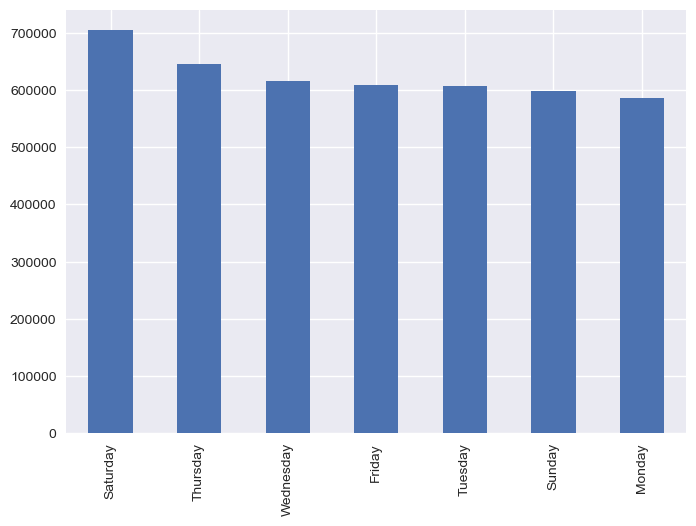

In [232]:
df_ride['started_weekday'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
mode_weekday_member=df_ride[df_ride['member_casual']== 'member']

In [ ]:
mode_weekday_casual=df_ride[df_ride['member_casual']== 'casual']

In [223]:
mode_weekday_member['started_weekday'].mode()

0    Saturday
Name: started_weekday, dtype: object

<AxesSubplot:>

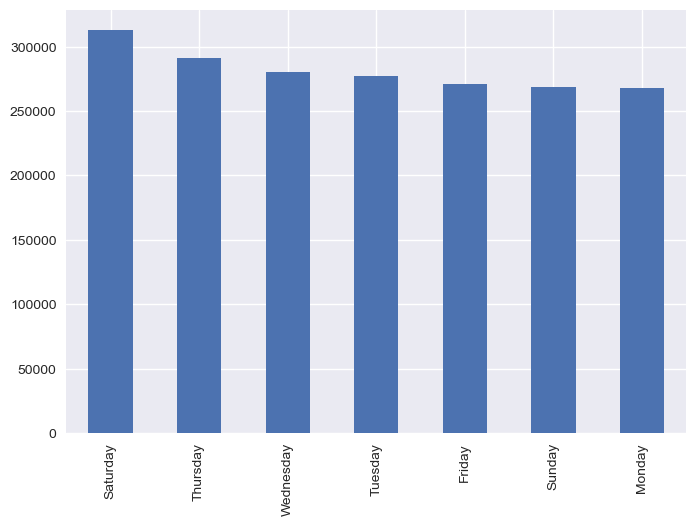

In [226]:
mode_weekday_member['started_weekday'].value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

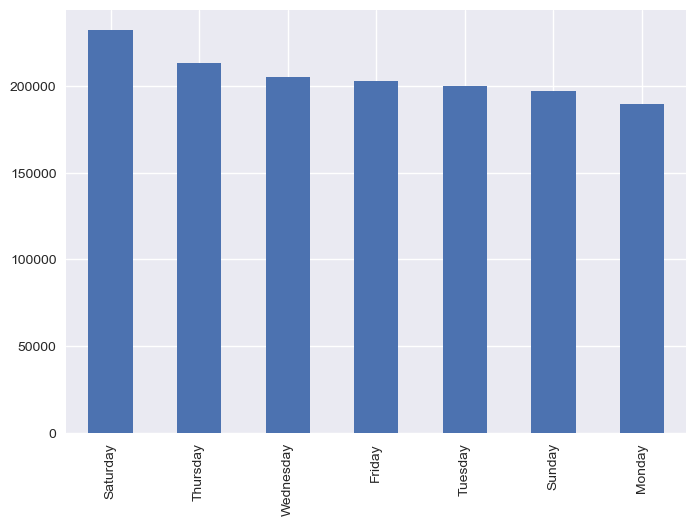

In [227]:
mode_weekday_casual['started_weekday'].value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

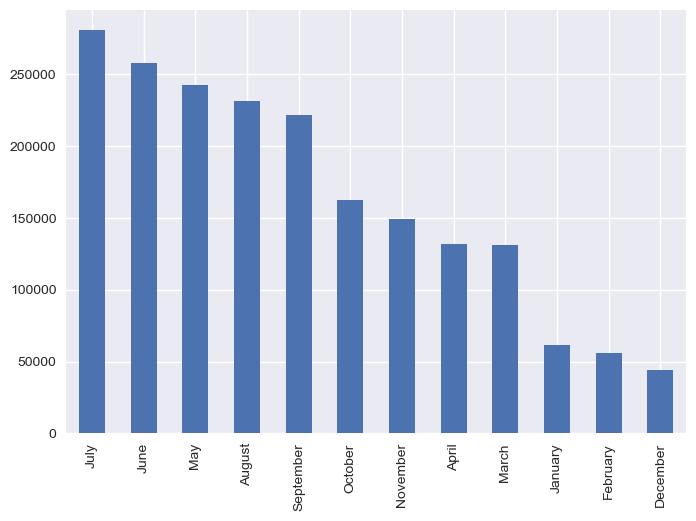

In [228]:
mode_weekday_member['started_month'].value_counts().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

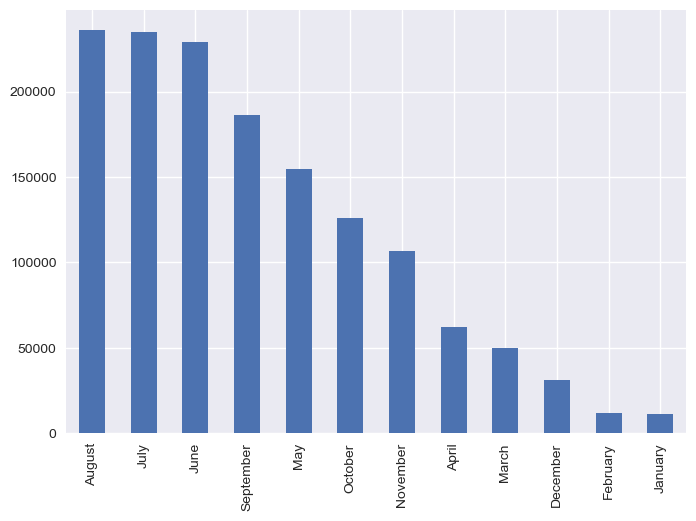

In [229]:
mode_weekday_casual['started_month'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [224]:
mode_weekday_casual['started_weekday'].mode()

0    Saturday
Name: started_weekday, dtype: object

In [220]:
mode_weekday_member['started_month'].mode()

0    July
Name: started_month, dtype: object

In [221]:
mode_weekday_casual['started_month'].mode()

0    August
Name: started_month, dtype: object

In [213]:
mean_ride_length_member['started_weekday'].mode()

0    Saturday
Name: started_weekday, dtype: object

In [233]:
mean_ride_length_member['ended_weekday'].value_counts()

Saturday     312338
Thursday     290886
Wednesday    280565
Tuesday      277467
Friday       270379
Sunday       270352
Monday       268193
Name: ended_weekday, dtype: int64

In [214]:
mean_ride_length_casual['started_weekday'].mode()

0    Saturday
Name: started_weekday, dtype: object

In [81]:
mean_ride_length_casual['ended_weekday'].value_counts()

Saturday     231901
Thursday     213055
Wednesday    205380
Friday       201960
Tuesday      199820
Sunday       198514
Monday       189630
Name: ended_weekday, dtype: int64

In [82]:
mean_ride_length_casual['ended_weekday'].mode()

0    Saturday
Name: ended_weekday, dtype: object

In [83]:
df_ride['started_weekday'].value_counts()

Saturday     705623
Thursday     645897
Wednesday    616371
Friday       608851
Tuesday      607639
Sunday       599049
Monday       585930
Name: started_weekday, dtype: int64

In [84]:
mean_ride_length_casual.loc[:,'ride_id']=df_cycle['ride_id']

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_6600\3599949634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_ride_length_casual.loc[:,'ride_id']=df_cycle['ride_id']


In [85]:
number_of_counts_casual=mean_ride_length_casual.groupby('started_weekday')['ride_id'].count().reset_index()

In [86]:
number_of_counts_casual

,started_weekday,ride_id
0,Friday,202680
1,Monday,189418
2,Saturday,232416
3,Sunday,197225
4,Thursday,213273
5,Tuesday,199807
6,Wednesday,205441


In [88]:
mean_ride_length_member.loc[:,'ride_id']=df_cycle['ride_id']

C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_6600\1476504336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_ride_length_member.loc[:,'ride_id']=df_cycle['ride_id']


In [89]:
number_of_count_member=mean_ride_length_member.groupby('started_weekday')['ride_id'].count().reset_index()

In [90]:
number_of_count_member.sort_values(by='ride_id',ascending=False)

,started_weekday,ride_id
2,Saturday,313187
4,Thursday,291079
6,Wednesday,280692
5,Tuesday,277473
0,Friday,271161
3,Sunday,268699
1,Monday,267889


The maximum number of rides for casual riders was on Saturday and lowest was recorded on Monday.

The maximum number of rides for annual members was on Saturday and lowest was recorded on Monday.

In [234]:
mean_ride_length_member.groupby('started_weekday')['ride_length'].mean().reset_index().sort_values(by='ride_length',ascending=False,ignore_index=True)

,started_weekday,ride_length
0,Saturday,0 days 00:20:35.983862676
1,Sunday,0 days 00:20:26.550750095
2,Monday,0 days 00:16:42.762875668
3,Friday,0 days 00:16:15.275400961
4,Thursday,0 days 00:15:20.196534274
5,Wednesday,0 days 00:14:42.846297721
6,Tuesday,0 days 00:14:39.527701794


In [93]:
mean_ride_length_casual.groupby('started_weekday')['ride_length'].mean().reset_index().sort_values(by='ride_length',ascending=False,ignore_index=True)

,started_weekday,ride_length
0,Saturday,0 days 00:20:55.412523234
1,Sunday,0 days 00:20:54.732097857
2,Monday,0 days 00:16:48.409596764
3,Friday,0 days 00:16:36.901494967
4,Thursday,0 days 00:15:31.367819648
5,Tuesday,0 days 00:15:08.861266121
6,Wednesday,0 days 00:14:57.434460502


Both members and casual riders prefer to ride for a minimum of 14 minutes and a maximum of 20 minutes. They tend to ride more on weekends and less on weekdays

In [94]:
mean_ride_length_member.groupby('started_weekday')['ride_length'].mean().reset_index().sort_values(by='ride_length',ascending=False,ignore_index=True)

,started_weekday,ride_length
0,Saturday,0 days 00:20:35.983862676
1,Sunday,0 days 00:20:26.550750095
2,Monday,0 days 00:16:42.762875668
3,Friday,0 days 00:16:15.275400961
4,Thursday,0 days 00:15:20.196534274
5,Wednesday,0 days 00:14:42.846297721
6,Tuesday,0 days 00:14:39.527701794


In [95]:
df_ride.groupby('started_weekday')['ride_length'].mean().reset_index().sort_values(by='ride_length',ascending=False,ignore_index=True)

,started_weekday,ride_length
0,Saturday,0 days 00:20:38.209171186
1,Sunday,0 days 00:20:34.558835754
2,Monday,0 days 00:16:38.239607120
3,Friday,0 days 00:16:21.984989759
4,Thursday,0 days 00:15:22.123868047
5,Tuesday,0 days 00:14:54.559707326
6,Wednesday,0 days 00:14:46.610176338


<AxesSubplot:xlabel='member_casual', ylabel='distance'>

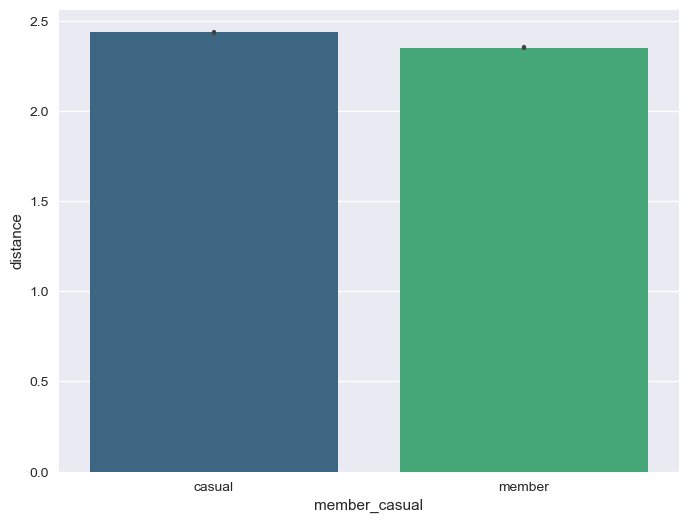

In [237]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='distance', data=df_ride, palette='viridis')

<AxesSubplot:xlabel='member_casual', ylabel='ride_length_mins'>

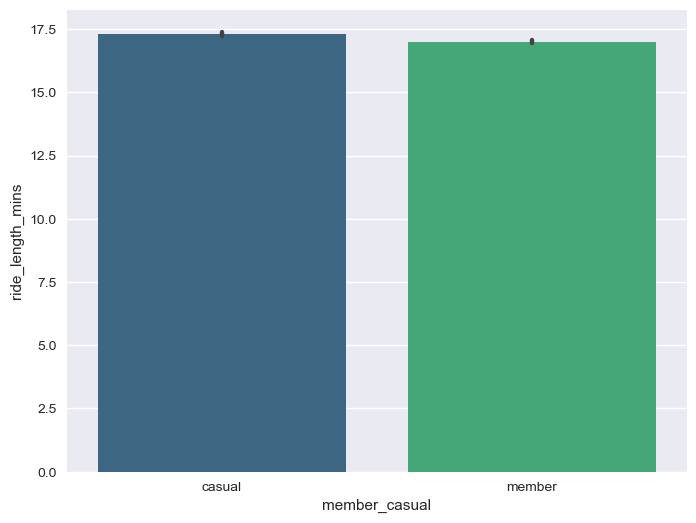

In [241]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='ride_length_mins', data=df_ride, palette='viridis')

It can be observed that casual riders travel greater distances and ride more frequently than member riders.

In [253]:
df_ride['hour']=df_ride['started_at'].dt.hour

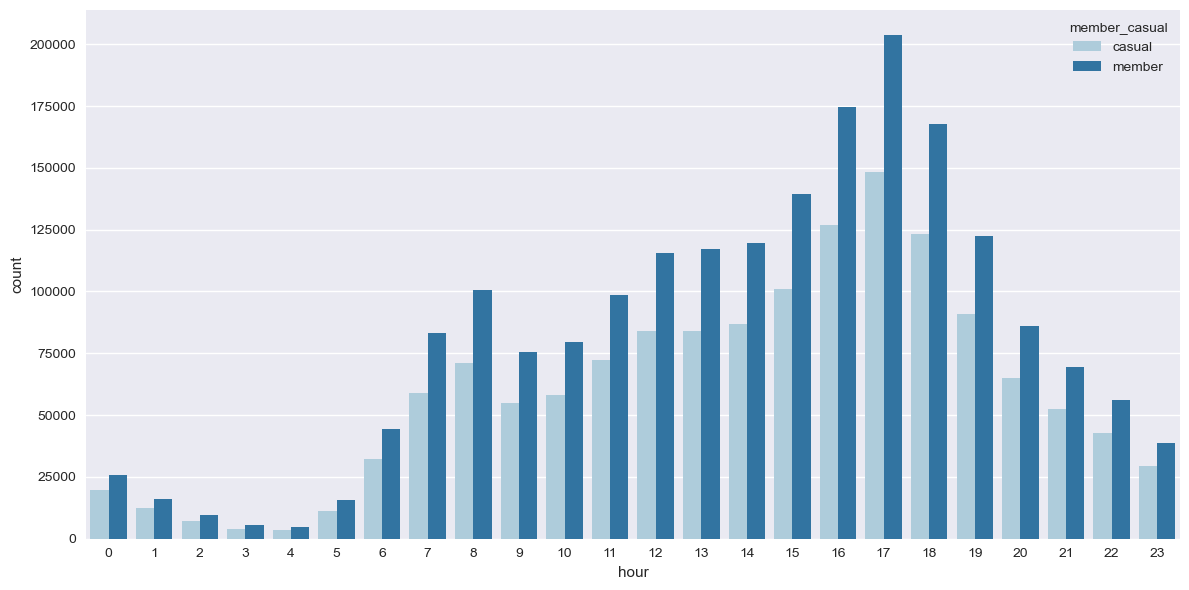

In [258]:
plt.figure(figsize=(12,6))
sns.countplot(x='hour', hue='member_casual', data=df_ride, palette='Paired')
plt.tight_layout()

* Evening hours see a lot of traffic compared to other timings. This is largly because of office timings of member riders. Casual member also find evening hours productive to go for a ride.

* Morning hours are again busy for member riders due to working hours. Casual members are using bikes for rides at late night somewhere around 9-11 PM.

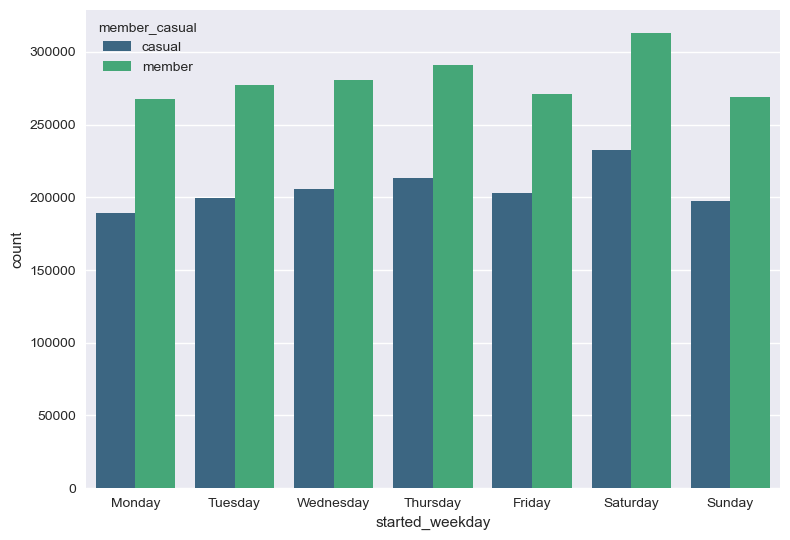

In [264]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='started_weekday', hue='member_casual', data=df_ride, palette='viridis',order=order)
plt.tight_layout()

* Casual riders are enthusiastic on weekends as they have the highest bike usage on Saturday, which decreases on Sunday, possibly due to the end of the weekend and the desire to preserve their energy for the upcoming weekdays

* Member riders have consistent use of bikes.

In [260]:
df_ride.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,ride_length,started_weekday,ride_length_hrs,ride_length_mins,distance,ended_weekday,started_month,ended_month,member_casual,hour
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:02:57,Thursday,0.05,2.95,0.94,Thursday,January,January,casual,11
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,0 days 00:04:21,Monday,0.07,4.35,0.93,Monday,January,January,casual,8
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,0 days 00:04:21,Tuesday,0.07,4.35,1.34,Tuesday,January,January,member,4
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,0 days 00:14:56,Tuesday,0.25,14.93,2.46,Tuesday,January,January,casual,0
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,0 days 00:06:02,Thursday,0.10,6.03,0.86,Thursday,January,January,member,1


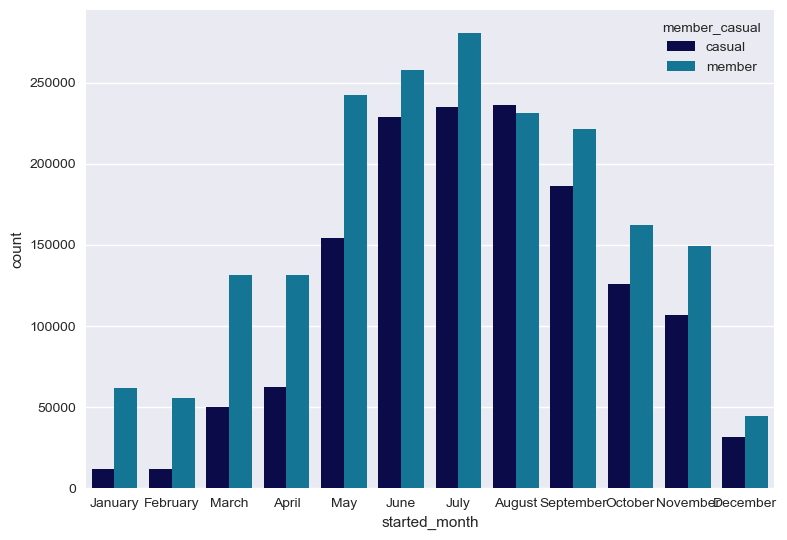

In [265]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
sns.countplot(x='started_month', hue='member_casual', data=df_ride, palette='ocean', order=order)
plt.tight_layout()

* The summer months have the highest bike usage, which can serve as a starting point for preparing a business strategy

In [102]:
member_casual=df_ride['member_casual'].value_counts()

In [103]:
member_casual.to_frame().index

Index(['member', 'casual'], dtype='object')

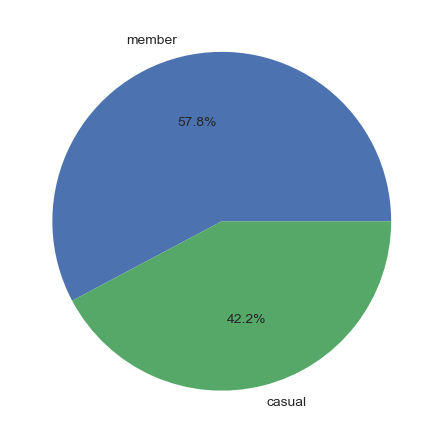

In [104]:
plt.style.use('seaborn')
plt.pie(member_casual.values,labels=member_casual.index,autopct='%1.1f%%')
plt.show()

Member riders are more than casual  riders

In [111]:
ride_type=df_ride.groupby('member_casual')['rideable_type'].value_counts()

In [112]:
ride_type

member_casual  rideable_type
casual         classic_bike      852128
               electric_bike     528538
               docked_bike        59594
member         classic_bike     1179404
               electric_bike     712656
               docked_bike        78120
Name: rideable_type, dtype: int64

In [113]:
member=[]
x_bikes=[]
y=list(ride_type.values)
for i,j in ride_type.index:
    x_bikes.append(j)
    member.append(i)

C:\Users\DEEPAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


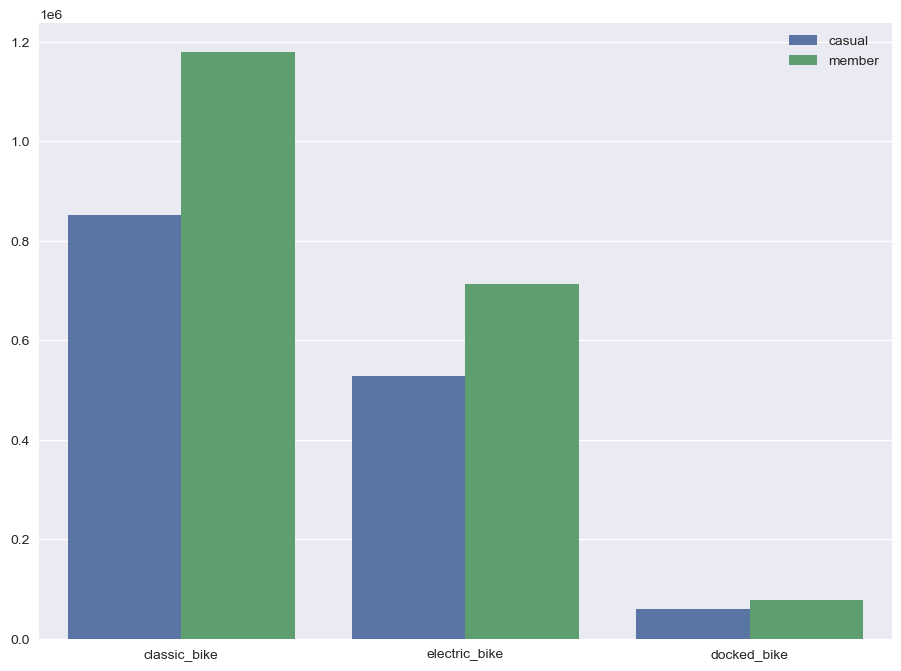

In [114]:
plt.figure(figsize=(11,8))
sns.barplot(x_bikes,y,hue=member)
plt.show()

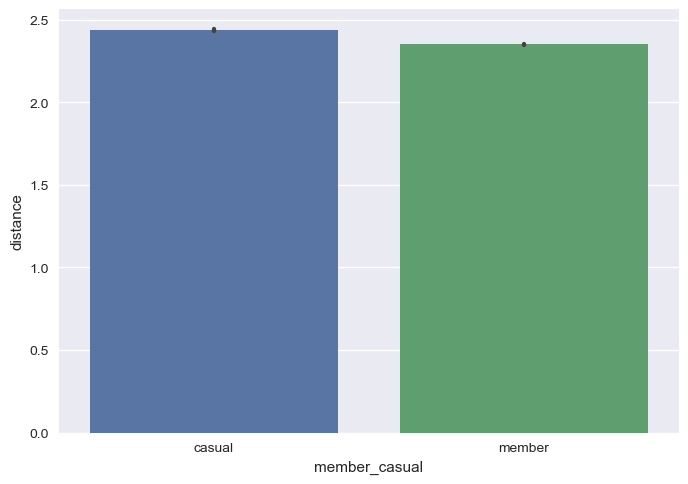

In [116]:
sns.barplot(x='member_casual',y='distance',data=df_ride)
plt.show()

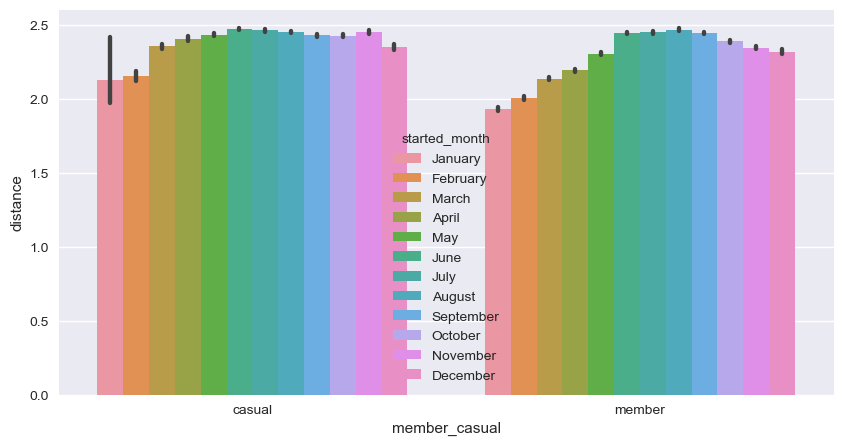

In [117]:
plt.figure(figsize=(10,5))
sns.barplot(x='member_casual',y='distance',data=df_ride,hue='started_month')
plt.show()

In [118]:
df_ride.groupby('member_casual')['distance'].mean()

member_casual
casual    2.437230
member    2.350979
Name: distance, dtype: float64

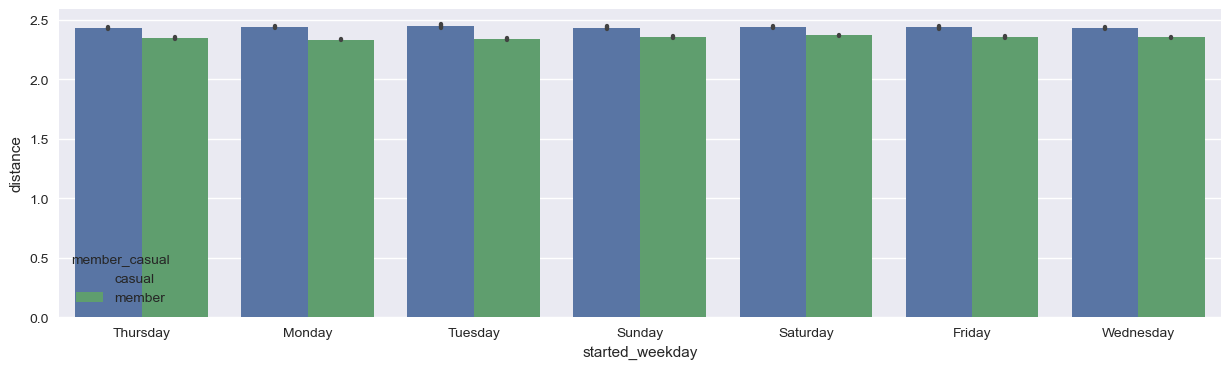

In [121]:
plt.figure(figsize=(15,4))
sns.barplot(x='started_weekday',y='distance',hue='member_casual',data=df_ride)
plt.show()

Surprisingly, casual riders travel a greater distance than member riders

In [122]:
top_10_station_start=df_ride['start_station_name'].value_counts().to_frame()[0:10].reset_index().rename(columns={'index':'station','start_station_name':'count'})

In [123]:
top_10_station_end=df_ride['end_station_name'].value_counts().to_frame()[0:10]

In [124]:
top_10_station_start

,station,count
0,Streeter Dr & Grand Ave,71269
1,DuSable Lake Shore Dr & Monroe St,39251
2,DuSable Lake Shore Dr & North Blvd,37698
3,Michigan Ave & Oak St,37208
4,Wells St & Concord Ln,34508
5,Millennium Park,32849
6,Clark St & Elm St,32560
7,Kingsbury St & Kinzie St,31614
8,Theater on the Lake,31283
9,Wells St & Elm St,28978


Text(0.5, 1.0, 'top 10 station people starts from')

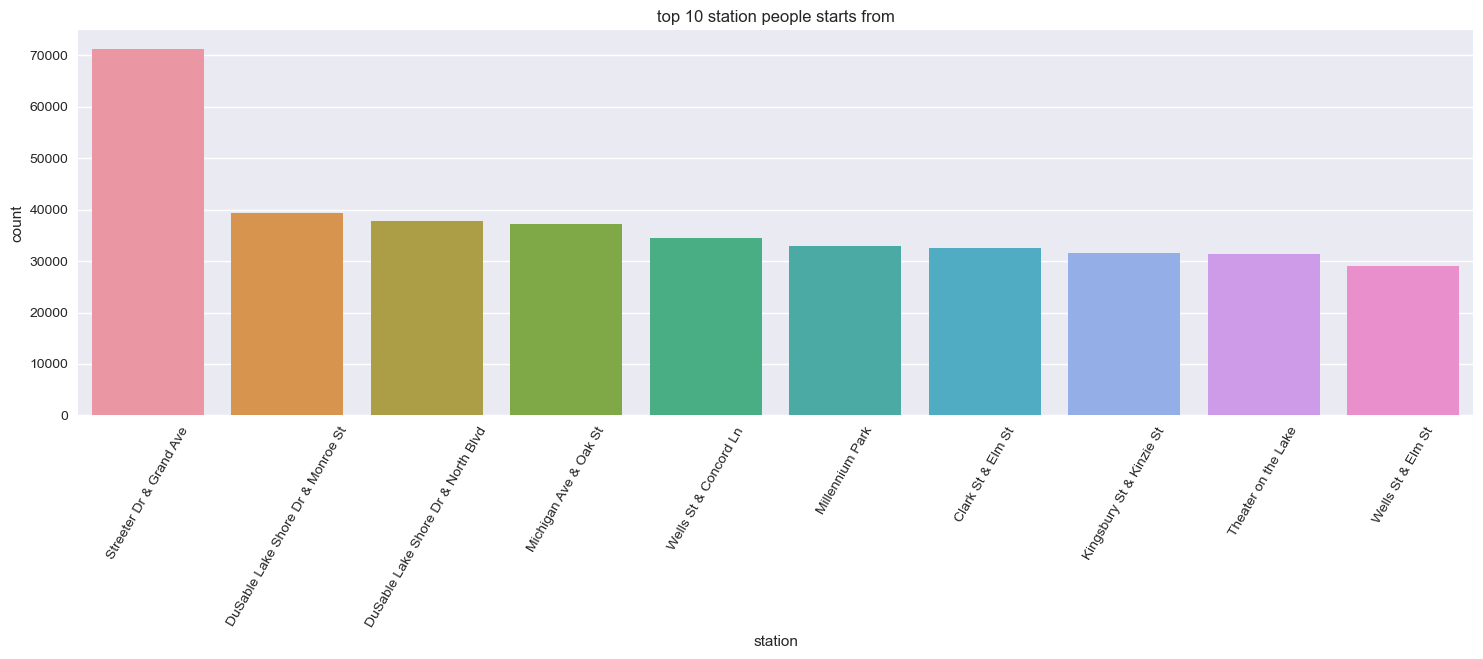

In [125]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=60)
sns.barplot(x='station',y='count',data=top_10_station_start)
plt.title('top 10 station people starts from')

In [126]:
top_10_station_end

,end_station_name
Streeter Dr & Grand Ave,72540
DuSable Lake Shore Dr & North Blvd,40563
DuSable Lake Shore Dr & Monroe St,38500
Michigan Ave & Oak St,38279
Wells St & Concord Ln,34688
Millennium Park,33705
Clark St & Elm St,32227
Theater on the Lake,31672
Kingsbury St & Kinzie St,30450
Wells St & Elm St,28346


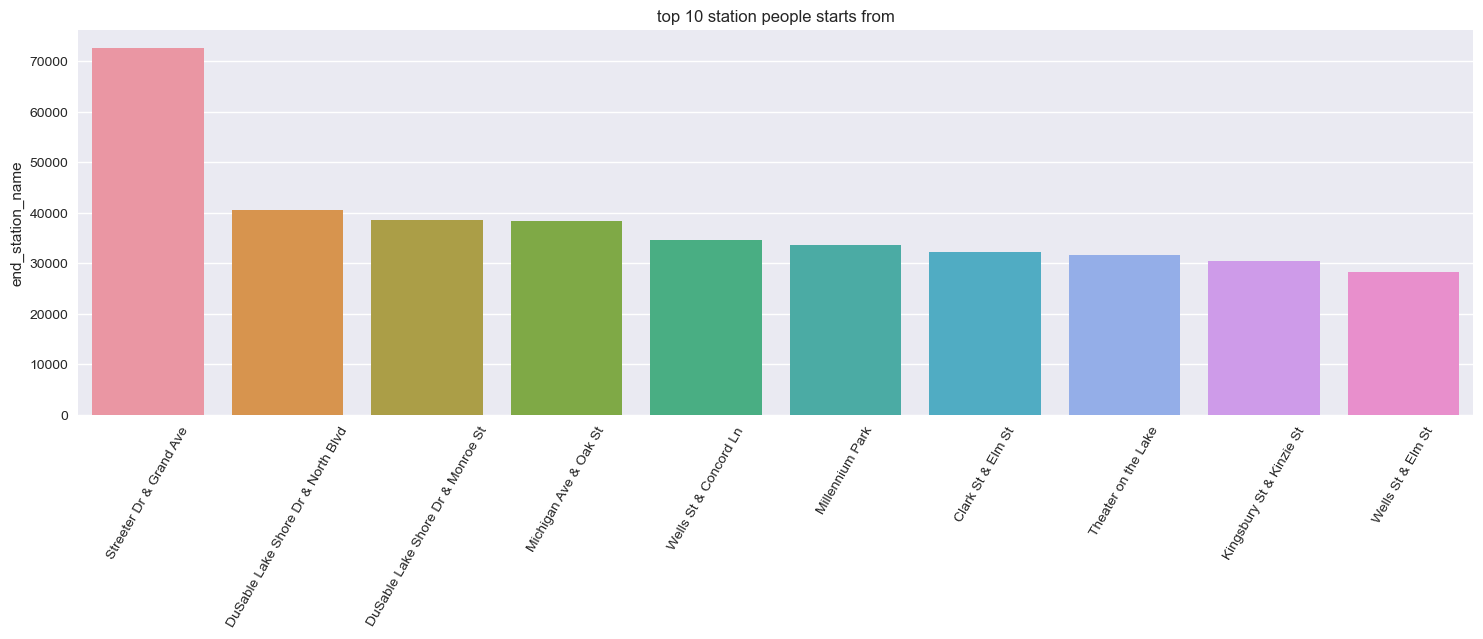

In [127]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=60)
sns.barplot(x=top_10_station_end.index,y=top_10_station_end['end_station_name'],data=top_10_station_start)
plt.title('top 10 station people starts from')
plt.show()

## Share

- **Business Objective**: To maximize the number of annual memberships by converting casual riders to annual members.

*  The bike usage trend highlightes the purpose for which the bikes are used. 


* Member riders tend to have annual memberships because they use bicycles more frequently, often for daily commutes over shorter distances.


* Casual riders tend to use bicycles more often for leisure or personal activities, and their usage is higher on weekends.


* The summer months are a more popular period, and businesses can focus on this time to maximize profits.


* A special "Summer Membership" could be introduced specifically for casual riders who are hesitant to commit to an annual membership.


* Coupons and discount schemes could be introduced to incentivize casual riders to increase their bike usage on weekdays or for shorter distance journeys.


* It is important for the business to promote the idea of using bikes regularly, not just for leisure activities, among casual riders.



*  To increase the size of our annual membership, we could offer special discounts on weekends. This strategy could be effective because our analysis shows that casual riders tend to ride more frequently on weekends


*  Casual members tend to have a longer average ride time than annual members. To increase our annual membership base, we could offer discounts to casual members based on ride duration, such as a 10% discount for rides lasting 10 minutes or more (on weekends). This discount could be limited to one use per casual member, and subsequent attempts to use the discount could trigger a notification informing them that these benefits are exclusive to annual members. 


*  We could also advertise on our platform about the benefits of a cleaner environment, emphasizing that the more we ride, the more we contribute to saving the environment. Such ads should be targeted towards casual members, as they may become more environmentally conscious and consider upgrading to an annual membership.


*  The number of docked bikes is lower than that of classic and electric bikes. To incentivize the use of docked bikes, we could offer discounts, but only to annual members. This strategy could encourage casual members to upgrade to an annual membership.

**Other Revenue generate**<br>
* Based on the analysis, the top 10 starting stations and top 10 ending stations are almost the same. This information can be leveraged to generate more revenue by sharing it with food stalls, event companies, or entertainment companies, allowing them to target areas of high bike traffic and potentially increase their revenue.
